# Predicting severe occurrences of automobile collisions in Seattle, WA

# ```Part 2: Exploratory Data Analysis```

## Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from collections import Counter

## Load cleaned collision dataset

In [2]:
# Import collision dataset and display the first five rows
df = pd.read_csv("Collisions_Clean.csv")
print(df.head())

   OBJECTID           X          Y      ADDRTYPE SEVERITYDESC COLLISIONTYPE  \
0         0 -122.356511  47.517361  Intersection   Not Severe        Angles   
1         1 -122.361405  47.702064         Block   Not Severe    Rear Ended   
2         2 -122.317414  47.664028         Block   Not Severe       Head On   
3         3 -122.318234  47.619927  Intersection   Not Severe    Pedestrian   
4         4 -122.351724  47.560306         Block   Not Severe         Other   

   PERSONCOUNT  PEDCOUNT  PEDCYLCOUNT  VEHCOUNT  ...  ROADCOND  \
0            2         0            0         2  ...       Dry   
1            2         0            0         2  ...       Wet   
2            2         0            0         2  ...       Dry   
3            3         1            0         1  ...       Wet   
4            2         0            0         1  ...  Snow/Ice   

                 LIGHTCOND                                         ST_COLDESC  \
0                 Daylight                     

In [3]:
df.drop(['OBJECTID'],axis=1,inplace=True)

In [4]:
df.head()

X          Y      ADDRTYPE SEVERITYDESC COLLISIONTYPE  \
0 -122.356511  47.517361  Intersection   Not Severe        Angles   
1 -122.361405  47.702064         Block   Not Severe    Rear Ended   
2 -122.317414  47.664028         Block   Not Severe       Head On   
3 -122.318234  47.619927  Intersection   Not Severe    Pedestrian   
4 -122.351724  47.560306         Block   Not Severe         Other   

   PERSONCOUNT  PEDCOUNT  PEDCYLCOUNT  VEHCOUNT  INJURIES  ...  ROADCOND  \
0            2         0            0         2         0  ...       Dry   
1            2         0            0         2         0  ...       Wet   
2            2         0            0         2         1  ...       Dry   
3            3         1            0         1         1  ...       Wet   
4            2         0            0         1         1  ...  Snow/Ice   

                 LIGHTCOND                                         ST_COLDESC  \
0                 Daylight                                  Entering at angle   
1                Dusk/Dawn  From same direction - both going straight - bo...   
2  Dark - Street Lights On               From opposite direction - all others   
3  Dark - Street Lights On             Vehicle going straight hits pedestrian   
4  Dark - Street Lights On                                       Fixed object   

  HITPARKEDCAR  year month day hour minute weekday  
0            N  2020     1  19    9      1       6  
1            N  2005     4  11   18     31       0  
2            N  2013     3  31    2      9       6  
3            N  2020     1   6   17     55       0  
4            N  2009    12  25   19      0       4  

[5 rows x 27 columns]

In [5]:
latitude = 47.635
longitude = -122.309

### Severe incidents are plotted on the Seattle map.

In [6]:
from folium import plugins

# Map of Seattle
seattle_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(seattle_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df[df['SEVERITYDESC']=='Severe']['Y'], df[df['SEVERITYDESC']=='Severe']['X'], df['COLLISIONTYPE']):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
        ).add_to(incidents)

# display map
seattle_map

&lt;folium.folium.Map at 0x7fe4899e3b70&gt;

### Analysis of independent variables with the dependent variable, SEVERITYDESC, for severe incidents

In [8]:
df_severe = df[df['SEVERITYDESC']=='Severe']
df_not_severe = df[df['SEVERITYDESC']=='Not Severe']

Address Type

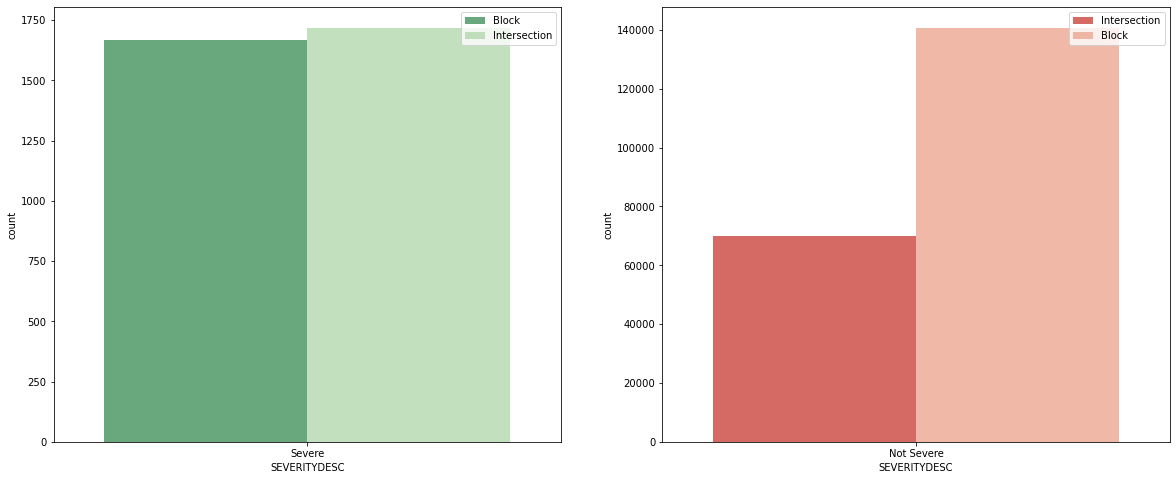

In [16]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.countplot(x='SEVERITYDESC',hue='ADDRTYPE',data=df_severe,alpha=0.8,palette='Greens_r')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
sns.countplot(x='SEVERITYDESC',hue='ADDRTYPE',data=df_not_severe,alpha=0.8,palette='Reds_r')
plt.legend(loc='upper right')

plt.show()

Junction Type

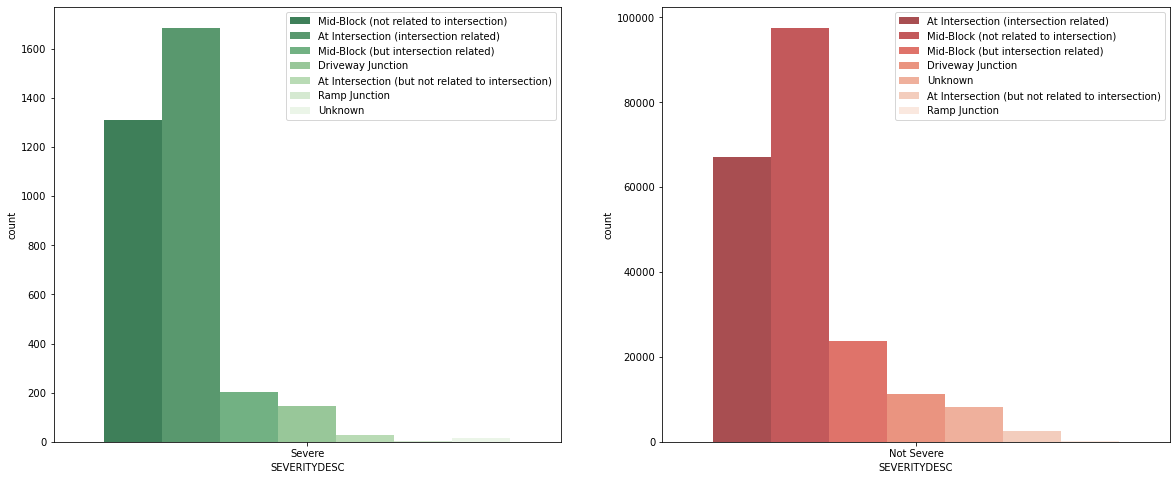

In [17]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.countplot(x='SEVERITYDESC',hue='JUNCTIONTYPE',data=df_severe,alpha=0.8,palette='Greens_r')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
sns.countplot(x='SEVERITYDESC',hue='JUNCTIONTYPE',data=df_not_severe,alpha=0.8,palette='Reds_r')
plt.legend(loc='upper right')

plt.show()

Weather

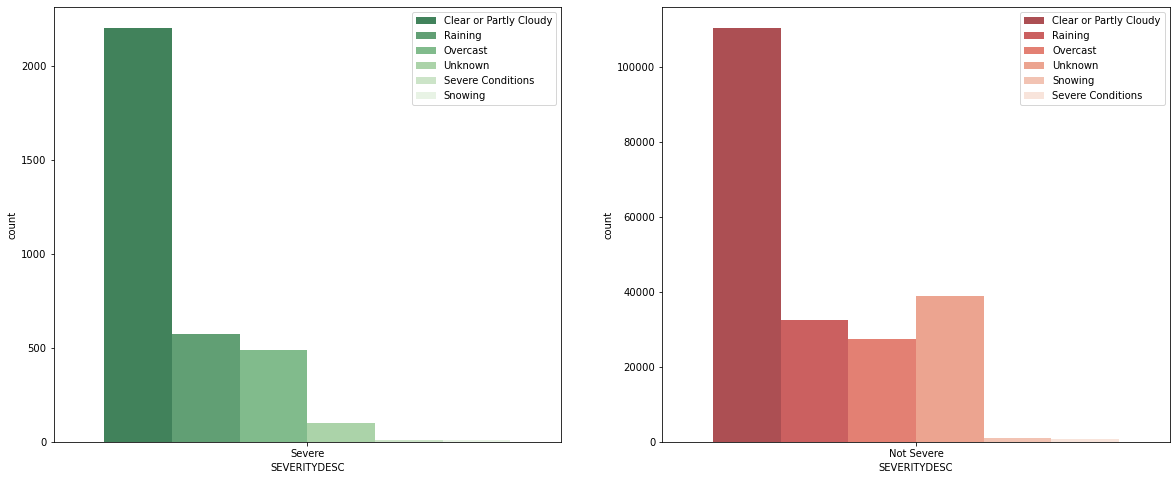

In [18]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.countplot(x='SEVERITYDESC',hue='WEATHER',data=df_severe,alpha=0.8,palette='Greens_r')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
sns.countplot(x='SEVERITYDESC',hue='WEATHER',data=df_not_severe,alpha=0.8,palette='Reds_r')
plt.legend(loc='upper right')

plt.show()

Road Condition

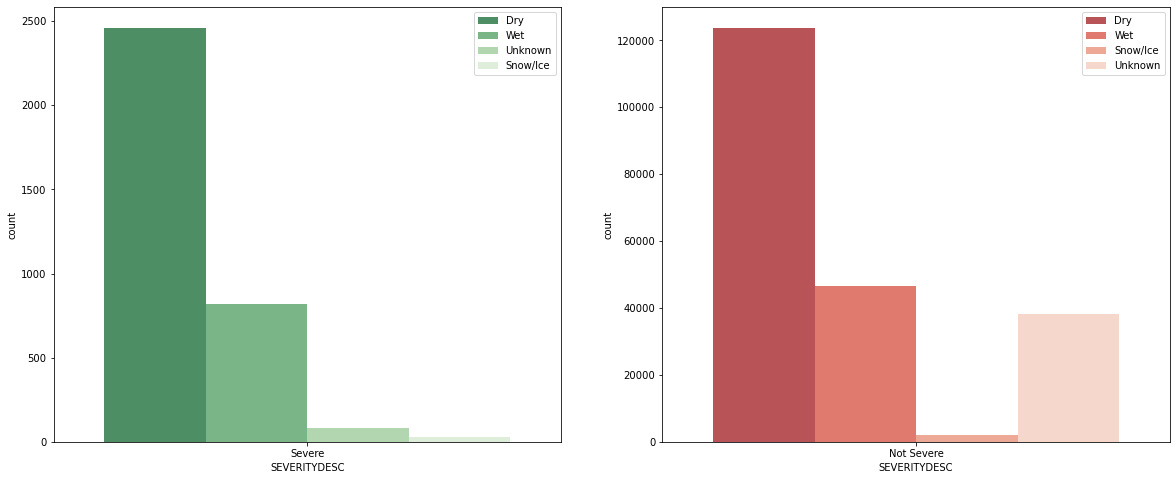

In [19]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.countplot(x='SEVERITYDESC',hue='ROADCOND',data=df_severe,alpha=0.8,palette='Greens_r')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
sns.countplot(x='SEVERITYDESC',hue='ROADCOND',data=df_not_severe,alpha=0.8,palette='Reds_r')
plt.legend(loc='upper right')

plt.show()

Light Condition

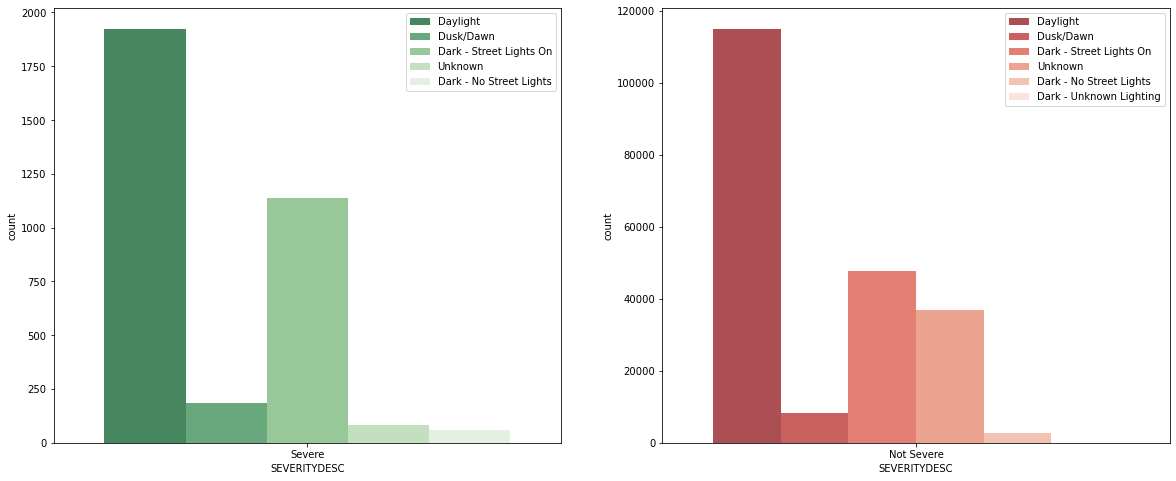

In [20]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.countplot(x='SEVERITYDESC',hue='LIGHTCOND',data=df_severe,alpha=0.8,palette='Greens_r')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
sns.countplot(x='SEVERITYDESC',hue='LIGHTCOND',data=df_not_severe,alpha=0.8,palette='Reds_r')
plt.legend(loc='upper right')

plt.show()

Year

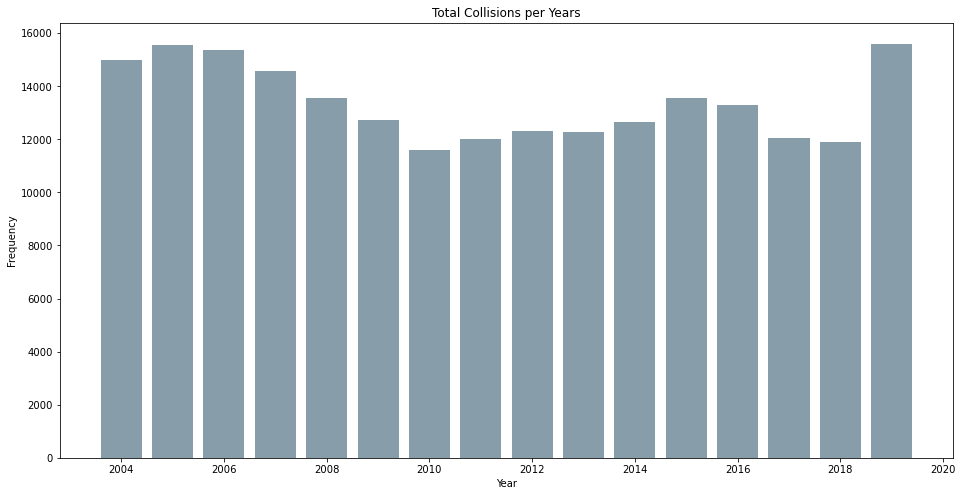

In [59]:
plt.figure(figsize=(16,8))

plt.hist(df['year'], range=(2004,2020),bins=16,rwidth=.8, alpha=0.75,color='#607c8e' ,align='left')
plt.title('Total Collisions per Years')
plt.xlabel('Year')
plt.ylabel('Frequency')

plt.show()

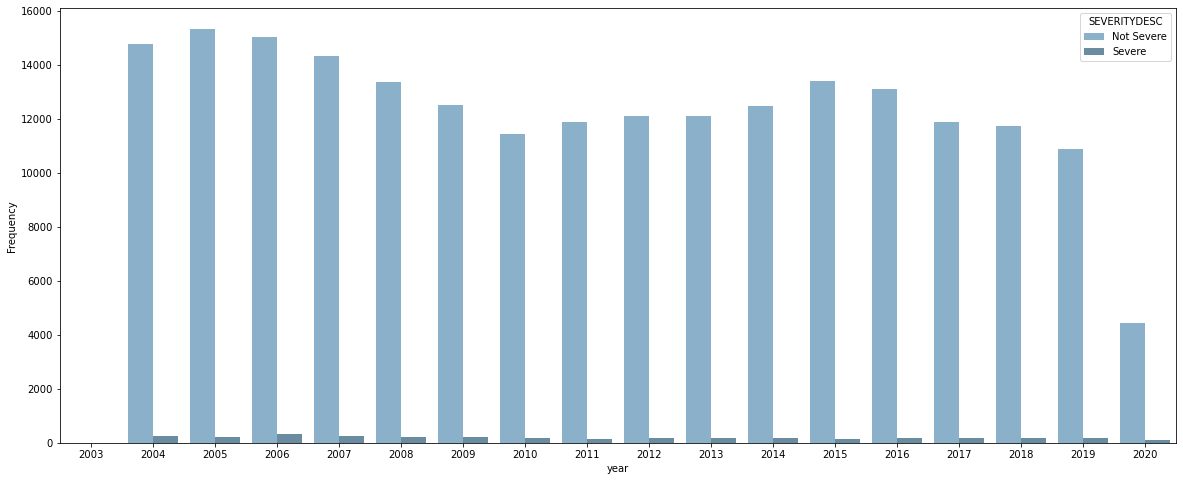

In [27]:
plt.figure(figsize=(20,8))

sns.countplot(x='year', hue='SEVERITYDESC', data=df, alpha=0.75, palette='PuBu_d')
plt.ylabel('Frequency')

plt.show()

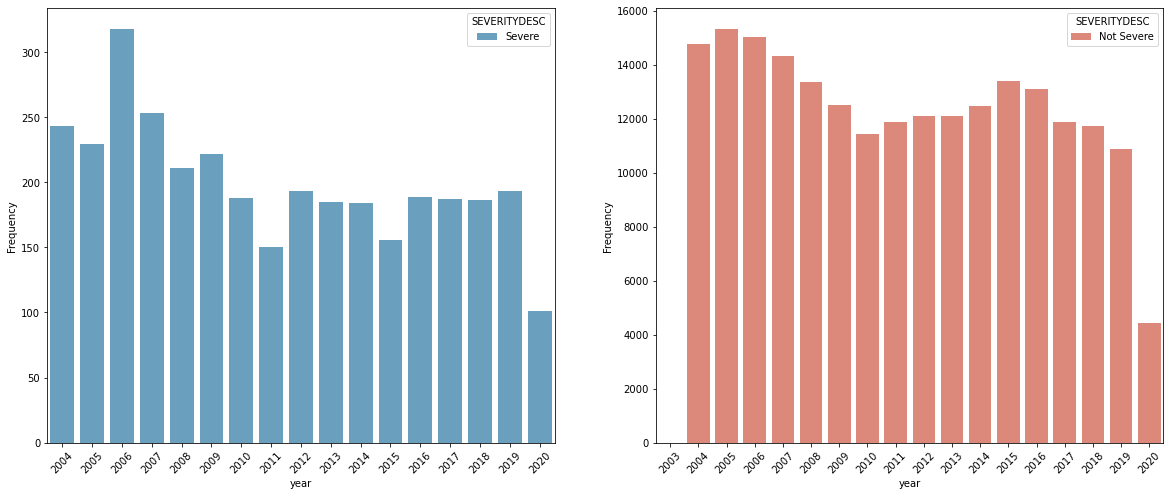

In [22]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(x='year', hue='SEVERITYDESC', data=df[df['SEVERITYDESC']=='Severe'], alpha=0.75, palette='PuBu_d')
plt.xticks(rotation=45)
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.countplot(x='year', hue='SEVERITYDESC', data=df[df['SEVERITYDESC']=='Not Severe'], alpha=0.75, palette='OrRd_d')
plt.xticks(rotation=45)
plt.ylabel('Frequency')

plt.show()

Month

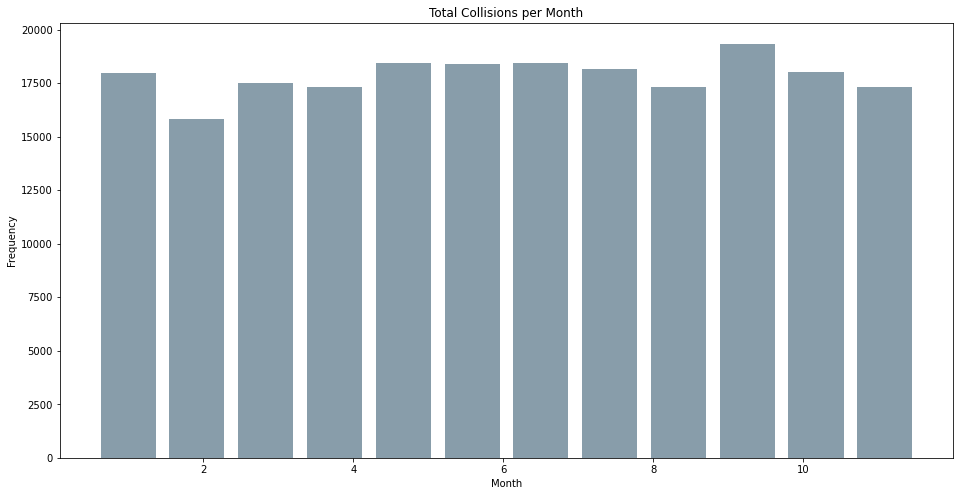

In [63]:
plt.figure(figsize=(16,8))

plt.hist(df['month'], bins=12, rwidth=.8, alpha=0.75,color='#607c8e' ,align='left')
plt.title('Total Collisions per Month')
plt.xlabel('Month')
plt.ylabel('Frequency')

plt.show()

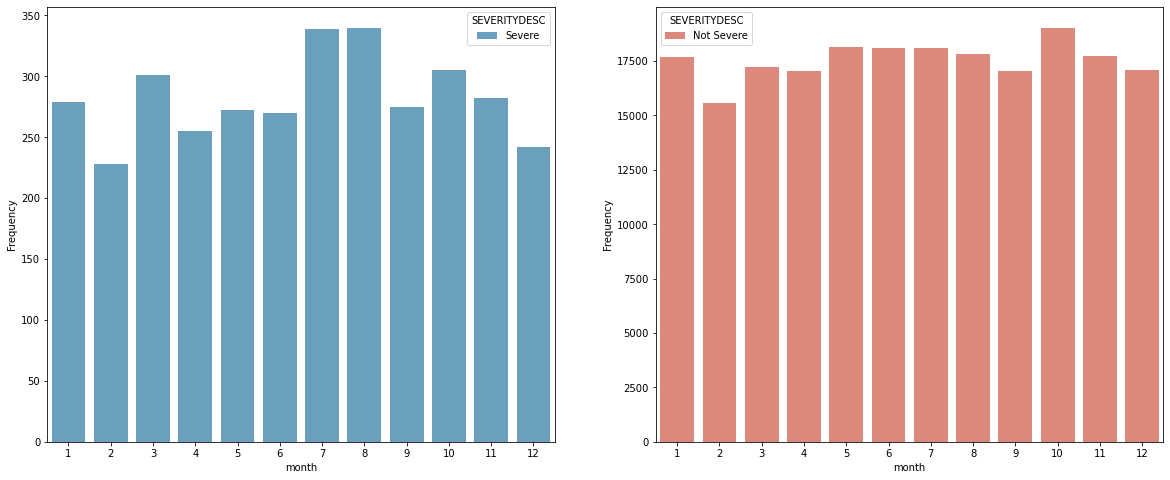

In [24]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.countplot(x='month', hue='SEVERITYDESC', data=df[df['SEVERITYDESC']=='Severe'], alpha=0.75, palette='PuBu_d')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.countplot(x='month', hue='SEVERITYDESC', data=df[df['SEVERITYDESC']=='Not Severe'], alpha=0.75, palette='OrRd_d')
plt.ylabel('Frequency')

plt.show()

In [54]:
temp = df[(df.hour + df.minute) > 0]

hr_severe=temp[temp['SEVERITYDESC']=='Severe']
hr_not_severe=temp[temp['SEVERITYDESC']=='Not Severe']


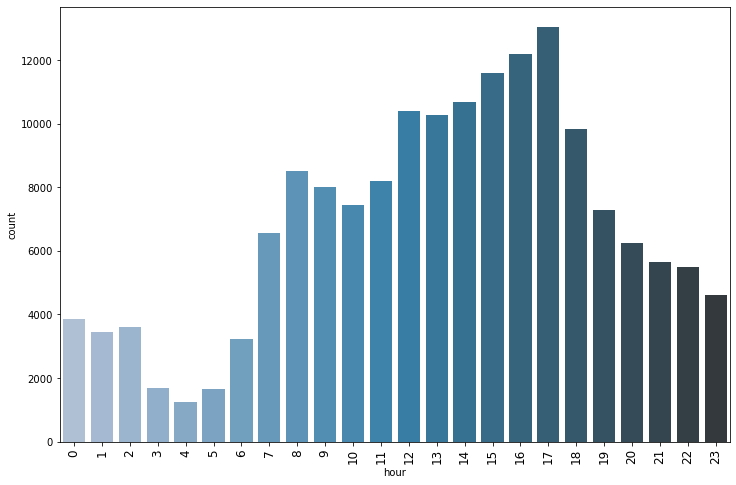

In [46]:
#sns.reset_defaults

#temppal=sns.dark_palette("#69d", reverse=True, as_cmap=True)
#custom_palette = sns.color_palette("Spectral")
#custom_palette = sns.dark_palette("#69d", 24)
#sns.palplot(custom_palette)

plt.figure(figsize=(12,8))
plt.xticks(rotation=90,size=12)

sns.countplot(data=temp, x = 'hour', palette='PuBu_d')

plt.show()

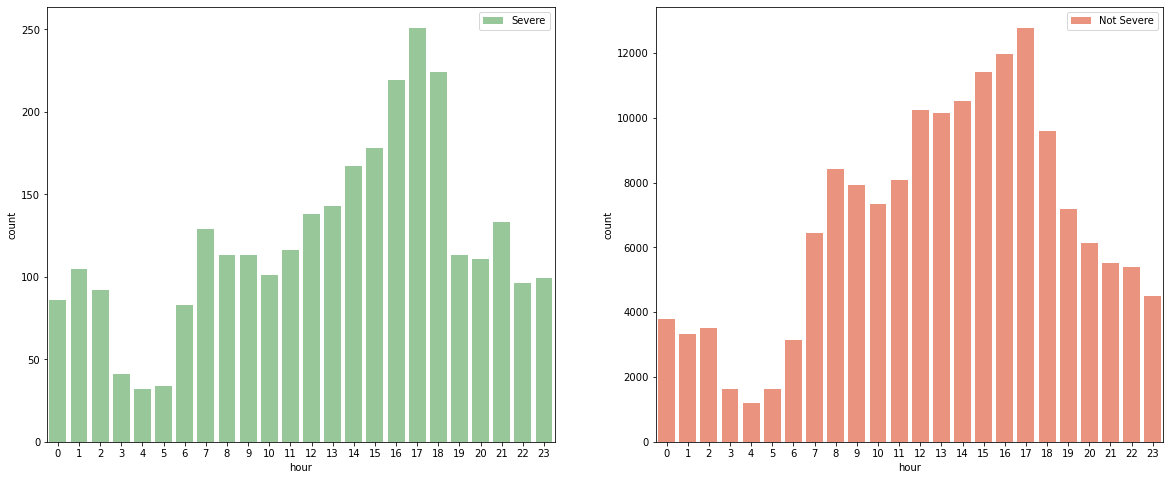

In [57]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.countplot(x='hour',hue='SEVERITYDESC',data=hr_severe,alpha=0.8,palette='Greens_r')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
sns.countplot(x='hour',hue='SEVERITYDESC',data=hr_not_severe,alpha=0.8,palette='Reds_r')
plt.legend(loc='upper right')

plt.show()

Day of the Week (Monday = 0)

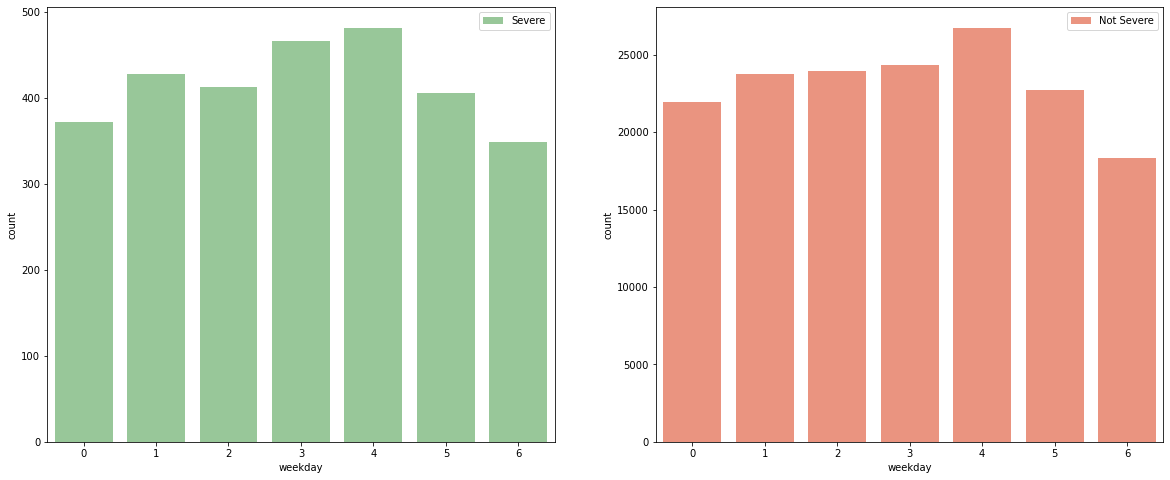

In [58]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.countplot(x='weekday',hue='SEVERITYDESC',data=hr_severe,alpha=0.8,palette='Greens_r')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
sns.countplot(x='weekday',hue='SEVERITYDESC',data=hr_not_severe,alpha=0.8,palette='Reds_r')
plt.legend(loc='upper right')

plt.show()